## 공공데이터 실습: 국가별 수산물 수출입 현황 (2021년)

- 아래 링크를 읽고 데이터프레임을 생성합니다.
  - https://bit.ly/Seafood_Trade_2021yr (구분자: ',', 인코딩방식: 'UTF-8')
  
  
- 데이터 전처리를 실습합니다.

### 실습 데이터셋 안내

- 2021년 1~12월에 전세계 165여 개 국가와 수산물 수출입 내역입니다.<br><br>

- 변수(열)에 대한 간단한 설명입니다.
  - ymonth: 거래년월
  - nation: 거래국가
  - itemNm: 거래품목(수산물)
  - imxprt: 수출/수입 구분
  - weight: 거래중량(kg)
  - dollar: 거래금액(달러)<br><br>

- 실습 데이터셋을 미리보기 합니다.
<img src="https://raw.githubusercontent.com/HelloDataScience/Images/main/Seafood%20Preview%202021.png" align="left" width="400">

### 실습 데이터셋 준비

In [2]:
# 관련 라이브러리를 호출합니다.
import os
import chardet
import requests
import numpy as np
import pandas as pd
from scipy import stats

In [3]:
# 온라인으로 공유 중인 csv 파일 주소를 URL1에 할당합니다.
URL1 = 'https://bit.ly/Seafood_Trade_2021yr'

In [4]:
# URL1에 있는 텍스트를 내려받습니다.(HTTP Requests)
# [힌트] requests.get() 함수를 사용하세요.
res = requests.get(URL1)

In [5]:
# res에서 문자열의 일부를 출력합니다.
res.text[:1000]

'"ymonth","nation","itemNm","imxprt","weight","dollar"\n"202101","가나","고등어","수출",107300,121443\n"202101","가나","기타","수입",10,2808\n"202101","가나","다랑어","수입",47446.8,241880\n"202101","가나","전갱이","수출",108000,106400\n"202101","가봉","어류","수입",1.615,26\n"202101","감비아","민어","수입",31238.5,196204\n"202101","과테말라","생선묵","수출",112.1,821\n"202101","과테말라","오징어","수출",12.24,86\n"202101","괌","갑각류","수출",1500,10712\n"202101","괌","갑오징어","수출",12,480\n"202101","괌","건조한 것","수출",4,744\n"202101","괌","김","수출",666,8830\n"202101","괌","김","수출",911.28,31548\n"202101","괌","다랑어","수출",54,360\n"202101","괌","다랑어류","수출",216,1507\n"202101","괌","달팽이","수출",96,565\n"202101","괌","멸치","수출",76,752\n"202101","괌","명태","수출",136,655\n"202101","괌","미역","수출",38,1085\n"202101","괌","생선묵","수출",1704,5070\n"202101","괌","수우프","수출",54,322\n"202101","괌","식염","수출",378,669\n"202101","괌","어류조제품","수출",389.5,946\n"202101","괌","오징어","수출",75,1107\n"202101","괌","조미오징어","수출",300.4,4960\n"202101","괌","조제품한 해조류 김 제외","수출",40,200\n"202101","괌","즙","수출",30,73

In [6]:
# res에서 바이너리 텍스트의 일부를 출력합니다.
# [힌트] content 속성을 사용하세요.
res.content[:1000]

b'"ymonth","nation","itemNm","imxprt","weight","dollar"\n"202101","\xea\xb0\x80\xeb\x82\x98","\xea\xb3\xa0\xeb\x93\xb1\xec\x96\xb4","\xec\x88\x98\xec\xb6\x9c",107300,121443\n"202101","\xea\xb0\x80\xeb\x82\x98","\xea\xb8\xb0\xed\x83\x80","\xec\x88\x98\xec\x9e\x85",10,2808\n"202101","\xea\xb0\x80\xeb\x82\x98","\xeb\x8b\xa4\xeb\x9e\x91\xec\x96\xb4","\xec\x88\x98\xec\x9e\x85",47446.8,241880\n"202101","\xea\xb0\x80\xeb\x82\x98","\xec\xa0\x84\xea\xb0\xb1\xec\x9d\xb4","\xec\x88\x98\xec\xb6\x9c",108000,106400\n"202101","\xea\xb0\x80\xeb\xb4\x89","\xec\x96\xb4\xeb\xa5\x98","\xec\x88\x98\xec\x9e\x85",1.615,26\n"202101","\xea\xb0\x90\xeb\xb9\x84\xec\x95\x84","\xeb\xaf\xbc\xec\x96\xb4","\xec\x88\x98\xec\x9e\x85",31238.5,196204\n"202101","\xea\xb3\xbc\xed\x85\x8c\xeb\xa7\x90\xeb\x9d\xbc","\xec\x83\x9d\xec\x84\xa0\xeb\xac\xb5","\xec\x88\x98\xec\xb6\x9c",112.1,821\n"202101","\xea\xb3\xbc\xed\x85\x8c\xeb\xa7\x90\xeb\x9d\xbc","\xec\x98\xa4\xec\xa7\x95\xec\x96\xb4","\xec\x88\x98\xec\xb6\x9c",12.24,86\n"

In [7]:
# 바이너리 텍스트의 인코딩 방식을 확인합니다.
# [힌트] chardet.detect() 함수를 사용하세요.
chardet.detect(res.content[:1000])

{'encoding': 'utf-8', 'confidence': 0.99, 'language': ''}

In [9]:
# URL1을 읽고, 데이터프레임 sfd를 생성합니다.
sfd = pd.read_csv(filepath_or_buffer = URL1, encoding = 'UTF-8')

In [10]:
# sfd의 정보를 확인합니다.
# [힌트] info() 함수를 사용하세요.
sfd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31865 entries, 0 to 31864
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ymonth  31865 non-null  int64  
 1   nation  31865 non-null  object 
 2   itemNm  31865 non-null  object 
 3   imxprt  31865 non-null  object 
 4   weight  31865 non-null  float64
 5   dollar  31865 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 1.5+ MB


In [11]:
a = [1, 2.0, '3']

In [12]:
sr = pd.Series(data = a)

In [13]:
sr

0      1
1    2.0
2      3
dtype: object

In [14]:
for i in sr:
    print(type(i))

<class 'int'>
<class 'float'>
<class 'str'>


In [15]:
sr + '등'

TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [16]:
sr.astype(float) + 1

0    2.0
1    3.0
2    4.0
dtype: float64

In [17]:
sr.astype(str) + '등'

0      1등
1    2.0등
2      3등
dtype: object

In [18]:
# sfd의 처음 5행을 출력합니다.
# [힌트] head() 함수를 사용하세요.
sfd.head(n = 5)

,ymonth,nation,itemNm,imxprt,weight,dollar
0,202101,가나,고등어,수출,107300.000,121443
1,202101,가나,기타,수입,10.000,2808
2,202101,가나,다랑어,수입,47446.800,241880
3,202101,가나,전갱이,수출,108000.000,106400
4,202101,가봉,어류,수입,1.615,26


In [19]:
# sfd의 마지막 5행을 출력합니다.
# [힌트] tail() 함수를 사용하세요.
sfd.tail(n = 10)

,ymonth,nation,itemNm,imxprt,weight,dollar
31855,202112,홍콩,조미오징어,수출,314.00,10678
31856,202112,홍콩,쥐치포,수출,733.00,16432
31857,202112,홍콩,즙,수출,480.00,725
31858,202112,홍콩,천연진주로만든 것,수출,0.40,1603
31859,202112,홍콩,파래,수출,1.25,214
31860,202112,홍콩,포유동물,수출,4.00,600
31861,202112,홍콩,해삼,수출,20.00,17000
31862,202112,홍콩,해삼,수출,180.00,1180
31863,202112,홍콩,해초류와조류,수출,16.00,153
31864,202112,홍콩,해파리,수출,81.60,515


### 실습 데이터셋 전처리

In [20]:
# ymonth의 자료형을 문자열로 변환하고 ymonth에 재할당합니다. 
# [힌트] astype() 함수를 사용하세요.
sfd['ymonth'] = sfd['ymonth'].astype(str)

In [21]:
# dollar를 1000으로 나눈 결과를 dollar에 재할당합니다.
sfd['dollar'] = sfd['dollar'] / 1000

In [23]:
sfd.dtypes

ymonth     object
nation     object
itemNm     object
imxprt     object
weight    float64
dollar    float64
dtype: object

In [22]:
# sfd의 수치형(정수형 또는 실수형) 변수에 대한 기술통계량을 확인합니다.
# [힌트] describe() 함수를 사용하세요.
sfd.describe()

,weight,dollar
count,3.186500e+04,31865.000000
mean,2.255741e+05,282.516008
std,4.805245e+06,1388.473510
min,0.000000e+00,0.000000
25%,5.000000e+01,0.838000
50%,7.340000e+02,8.251000
75%,1.469400e+04,78.132000
max,3.071980e+08,40737.080000


In [24]:
# sfd의 범주형 변수에 대한 기술통계량을 확인합니다.
sfd.describe(include = object)

,ymonth,nation,itemNm,imxprt
count,31865,31865,31865,31865
unique,12,165,206,2
top,202104,미국,기타,수출
freq,2772,3351,2707,17793


In [25]:
# nation의 빈도수를 확인합니다.
# [힌트] value_counts() 함수를 사용하세요.
sfd['nation'].value_counts()

미국        3351
중국        2905
일본        2614
베트남       1948
캐나다       1371
          ... 
우간다          1
룩셈부르크        1
포클랜드제도       1
조지아          1
통가           1
Name: nation, Length: 165, dtype: int64

In [37]:
# 교차표는 두 범주형 변수의 빈도수를 피벗팅합니다.
# crt = pd.crosstab(index = sfd['ymonth'], columns = sfd['nation'])
crt = pd.crosstab(index = sfd['nation'], 
                  columns = sfd['ymonth'],
                  margins = True, 
                  margins_name = '합계')

In [38]:
crt.to_excel(excel_writer = 'CrossTable.xlsx', sheet_name = 'Freq')

In [39]:
# 상대도수를 피벗팅하려면 normalize 매개변수를 추가합니다.
crt = pd.crosstab(index = sfd['nation'], 
                  columns = sfd['ymonth'],
                  margins = True, 
                  margins_name = '합계',
                  normalize = 'index')

In [40]:
crt.to_excel(excel_writer = 'CrossTable.xlsx', sheet_name = 'Prop')

### 국가별 수출입금액을 합산하고 무역수지 흑자 상위 국가 확인

In [41]:
# 아래 조건을 만족하는 피벗 테이블을 trade에 할당합니다.
# [힌트] pd.pivot_table() 함수를 사용하세요.
# 데이터(data)는 sfd, 값(values)은 dollar, 행이름(index)은 nation, 
# 열이름(columns)은 imxprt, 집계함수는 np.sum을 지정하세요.
trade = pd.pivot_table(
    data = sfd,
    values = 'dollar', 
    index = 'nation',
    columns = 'imxprt', 
    aggfunc = np.sum
)

In [43]:
# trade의 행 개수를 출력합니다.
# [힌트] shape 속성 결과에 0번 인덱스 원소를 선택하세요.
trade.shape[0]

165

In [44]:
# trade의 처음 5행을 출력합니다.
trade.head()

imxprt,수입,수출
nation,,
가나,1847.987,8088.674
가봉,0.026,NaN
가이아나,17.290,0.036
감비아,2065.081,NaN
과테말라,NaN,131.373


In [48]:
pd.pivot_table(
    data = sfd,
    values = 'dollar', 
    index = 'nation',
    columns = 'imxprt', 
    aggfunc = [np.sum, np.size, np.mean, np.std]
)

sum              size               mean              \
imxprt         수입         수출     수입     수출          수입          수출   
nation                                                               
가나       1847.987   8088.674   14.0   30.0  131.999071  269.622467   
가봉          0.026        NaN    1.0    NaN    0.026000         NaN   
가이아나       17.290      0.036    1.0    1.0   17.290000    0.036000   
감비아      2065.081        NaN   24.0    NaN   86.045042         NaN   
과테말라          NaN    131.373    NaN  112.0         NaN    1.172973   
...           ...        ...    ...    ...         ...         ...   
피지          1.362     69.910    1.0   16.0    1.362000    4.369375   
핀란드         5.993    377.437    2.0    8.0    2.996500   47.179625   
필리핀     29771.506  37663.369  381.0  709.0   78.140436   53.121818   
헝가리         1.957     18.857    3.0    7.0    0.652333    2.693857   
홍콩      32389.424  54560.233   94.0  946.0  344.568340   57.674665   

                std              
imxprt           수입          수출  
nation                           
가나       156.609224  542.453956  
가봉              NaN         NaN  
가이아나            NaN         NaN  
감비아      119.921323         NaN  
과테말라            NaN    2.351919  
...             ...         ...  
피지              NaN    7.350710  
핀란드        3.264712   25.152760  
필리핀      167.776507  178.693117  
헝가리        0.415596    1.867109  
홍콩      1810.756656  319.837881  

[165 rows x 8 columns]

In [51]:
type(trade)

pandas.core.frame.DataFrame

In [52]:
# 파이썬 객체의 속성(attribute)과 방식(method) 목록을 리스트로 반환합니다.
dir(trade)

['T',
 '_AXIS_LEN',
 '_AXIS_ORDERS',
 '_AXIS_TO_AXIS_NUMBER',
 '_HANDLED_TYPES',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__dataframe__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__reduce__',
 '__reduce_ex_

In [49]:
# trade에 있는 결측값을 0으로 대체하고 trade에 재할당합니다.
# [힌트] fillna() 함수를 사용하세요.
trade = trade.fillna(value = 0)

In [50]:
trade.head()

imxprt,수입,수출
nation,,
가나,1847.987,8088.674
가봉,0.026,0.000
가이아나,17.290,0.036
감비아,2065.081,0.000
과테말라,0.000,131.373


In [53]:
# trade의 인덱스를 출력합니다.
# [힌트] index 속성을 사용하세요.
trade.index

Index(['가나', '가봉', '가이아나', '감비아', '과테말라', '괌', '그리스', '그린란드', '기니', '기니비사우',
       ...
       '포클랜드제도', '폴란드', '푸에르토리코', '프랑스', '프랑스령 폴리네시아', '피지', '핀란드', '필리핀',
       '헝가리', '홍콩'],
      dtype='object', name='nation', length=165)

In [63]:
# trade의 인덱스 네임을 '국가'로 변경합니다.
# [힌트] index.name 속성을 사용하세요.
trade.index.name = '국가'

In [64]:
# trade의 열이름을 출력합니다.
# [힌트] columns 속성을 사용하세요.
trade.columns

Index(['수입', '수출'], dtype='object')

In [65]:
# trade의 열이름 네임에 빈 문자열을 지정합니다.
# [힌트] columns.name 속성을 사용하세요.
trade.columns.name = None

In [66]:
trade.head()

,수입,수출
국가,,
가나,1847.987,8088.674
가봉,0.026,0.000
가이아나,17.290,0.036
감비아,2065.081,0.000
과테말라,0.000,131.373


In [67]:
# trade의 인덱스를 초기화합니다.
# [힌트] reset_index() 함수를 사용하세요.
# [참고] 기존 인덱스를 열로 추가하려면 drop = True를 추가하지 않습니다.
trade = trade.reset_index()

In [68]:
# trade의 처음 5행을 출력합니다.
trade.head()

,국가,수입,수출
0,가나,1847.987,8088.674
1,가봉,0.026,0.000
2,가이아나,17.290,0.036
3,감비아,2065.081,0.000
4,과테말라,0.000,131.373


In [69]:
# trade의 수출에서 수입을 뺀 무역수지를 생성합니다.
trade['무역수지'] = trade['수출'] - trade['수입']

In [70]:
# trade를 무역수지로 내림차순 정렬하고 trade에 재할당합니다.
# [힌트] sort_values() 함수를 사용하세요.
trade = trade.sort_values(by = ['무역수지'], ascending = False)

In [71]:
# trade의 처음 10행을 출력합니다.(무역수지 흑자 국가)
trade.head(n = 10)

,국가,수입,수출,무역수지
116,일본,170243.592,635499.670,465256.078
49,미국,250113.606,395386.470,145272.864
158,프랑스,34315.325,66501.818,32186.493
113,이탈리아,25683.273,52961.214,27277.941
25,독일,1263.392,27186.712,25923.320
164,홍콩,32389.424,54560.233,22170.809
87,싱가포르,2593.154,21449.930,18856.776
14,네덜란드,5373.894,20403.436,15029.542
162,필리핀,29771.506,37663.369,7891.863
50,미령사모아,811.309,8649.957,7838.648


In [72]:
# trade의 마지막 10행을 출력합니다.(무역수지 적자 국가)
trade.tail(n = 10)

,국가,수입,수출,무역수지
22,대만,129664.240,60066.032,-69598.208
89,아르헨티나,69720.069,53.530,-69666.539
127,캐나다,113857.715,41938.119,-71919.596
114,인도,106905.400,687.022,-106218.378
122,칠레,119811.899,1426.241,-118385.658
153,페루,165384.173,2710.209,-162673.964
119,중국,1300449.248,726529.129,-573920.119
17,노르웨이,575973.581,1884.646,-574088.935
58,베트남,808388.014,177741.726,-630646.288
29,러시아,1219825.619,54078.994,-1165746.625


### 통계청 1인당 국민총소득 데이터 (2021년)

- 아래 링크를 읽고 데이터프레임을 생성합니다.
  - url: https://bit.ly/GDP_Per_Capita_2021 (구분자: ',', 인코딩방식: 'EUC-KR')
  
  
- 데이터 전처리를 실행하고, trade와 병합합니다.

In [73]:
# 위 링크를 URL2에 할당합니다.
URL2 = 'https://bit.ly/GDP_Per_Capita_2021'

In [74]:
# URL2에 있는 텍스트를 내려받습니다.(HTTP Requests)
res = requests.get(URL2)

In [75]:
# res에서 바이너리 텍스트의 일부를 출력합니다.
res.content[:1000]

b'"\xb1\xb9\xb0\xa1",2019,2020,2021\n"\xbe\xc6\xc7\xc1\xb0\xa1\xb4\xcf\xbd\xba\xc5\xba",520,500,-\n"\xbe\xc6\xb8\xa3\xb8\xde\xb4\xcf\xbe\xc6",4660,4220,4560\n"\xbe\xc6\xc1\xa6\xb8\xa3\xb9\xd9\xc0\xcc\xc0\xdc",4510,4480,4880\n"\xb9\xd9\xb7\xb9\xc0\xce",22230,19930,-\n"\xb9\xe6\xb1\xdb\xb6\xf3\xb5\xa5\xbd\xc3",2250,2340,2620\n"\xba\xce\xc5\xba",3150,2840,-\n"\xba\xea\xb7\xe7\xb3\xaa\xc0\xcc",32230,31510,-\n"\xc4\xaf\xba\xb8\xb5\xf0\xbe\xc6",1530,1510,1550\n"\xc1\xdf\xb1\xb9",10310,10530,11890\n"\xc5\xb0\xc7\xc1\xb7\xce\xbd\xba",28600,26490,28130\n"\xc1\xb6\xc1\xf6\xbe\xc6",4690,4260,4740\n"\xc8\xab\xc4\xe1",50480,48560,54450\n"\xc0\xce\xb5\xb5",2100,1910,2170\n"\xc0\xce\xb5\xb5\xb3\xd7\xbd\xc3\xbe\xc6",4050,3870,4140\n"\xc0\xcc\xb6\xf5",4260,3370,-\n"\xc0\xcc\xb6\xf3\xc5\xa9",5780,4990,5040\n"\xc0\xcc\xbd\xba\xb6\xf3\xbf\xa4",43540,42610,49560\n"\xc0\xcf\xba\xbb",42010,40810,42620\n"\xbf\xe4\xb8\xa3\xb4\xdc",4410,4310,4480\n"\xc4\xab\xc0\xda\xc8\xe5\xbd\xba\xc5\xba",8820,8710,8720\n"\xb4

In [76]:
# 바이너리 텍스트의 인코딩 방식을 확인합니다.
chardet.detect(res.content[:1000])

{'encoding': 'EUC-KR', 'confidence': 0.9242424242424242, 'language': 'Korean'}

In [78]:
# URL2를 읽고, 데이터프레임 gdp를 생성합니다.
gdp = pd.read_csv(URL2, encoding = 'EUC-KR')

In [79]:
# gdp의 정보를 확인합니다.
gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   국가      193 non-null    object
 1   2019    193 non-null    int64 
 2   2020    193 non-null    object
 3   2021    193 non-null    object
dtypes: int64(1), object(3)
memory usage: 6.2+ KB


In [80]:
# gdp의 처음 5행을 출력합니다.
gdp.head()

,국가,2019,2020,2021
0,아프가니스탄,520,500,-
1,아르메니아,4660,4220,4560
2,아제르바이잔,4510,4480,4880
3,바레인,22230,19930,-
4,방글라데시,2250,2340,2620


In [81]:
# gdp의 열이름을 출력합니다.
gdp.columns

Index(['국가', '2019', '2020', '2021'], dtype='object')

In [82]:
# gdp에서 '2019', '2020' 열을 삭제합니다.
# [힌트] drop() 함수를 사용하세요.
gdp = gdp.drop(columns = ['2019', '2020'])

In [83]:
# gdp에서 '2021'의 이름을 '인당GDP'로 변경합니다.
# [힌트] rename() 함수를 사용하세요.
gdp = gdp.rename(columns = {'2021': '인당GDP'})

In [84]:
gdp.head()

,국가,인당GDP
0,아프가니스탄,-
1,아르메니아,4560
2,아제르바이잔,4880
3,바레인,-
4,방글라데시,2620


In [86]:
gdp['인당GDP'].eq('-')

0       True
1      False
2      False
3       True
4      False
       ...  
188    False
189    False
190     True
191    False
192    False
Name: 인당GDP, Length: 193, dtype: bool

In [87]:
# 인당GDP에서 원소가 '-'이면 결측값(np.nan)으로 변경합니다.
# [힌트] np.where()와 eq() 함수를 사용하세요.
gdp['인당GDP'] = np.where(gdp['인당GDP'].eq('-'), np.nan, gdp['인당GDP'])

In [88]:
gdp.head()

,국가,인당GDP
0,아프가니스탄,NaN
1,아르메니아,4560
2,아제르바이잔,4880
3,바레인,NaN
4,방글라데시,2620


In [90]:
gdp['인당GDP'] = gdp['인당GDP'].astype(float)

In [92]:
gdp['인당GDP'].ge(23000).sum()

35

In [100]:
gdp['인당GDP'].ge(23000).mean()

0.18134715025906736

In [95]:
(gdp['인당GDP'] > 23000).sum()

35

In [98]:
(gdp['인당GDP'] < 23000) & (gdp['인당GDP'] >= 6500)

0      False
1      False
2      False
3      False
4      False
       ...  
188    False
189    False
190    False
191     True
192    False
Name: 인당GDP, Length: 193, dtype: bool

In [99]:
gdp['인당GDP'].lt(23000) & gdp['인당GDP'].ge(6500)

0      False
1      False
2      False
3      False
4      False
       ...  
188    False
189    False
190    False
191     True
192    False
Name: 인당GDP, Length: 193, dtype: bool

In [103]:
gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   국가      193 non-null    object 
 1   인당GDP   172 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.1+ KB


In [102]:
# gdp의 열별 결측값 개수를 확인합니다.
# [힌트] isna()와 sum() 함수를 사용하세요.
gdp.isna().sum()

국가        0
인당GDP    21
dtype: int64

In [104]:
# gdp의 처음 5행을 출력합니다.
gdp.head()

,국가,인당GDP
0,아프가니스탄,NaN
1,아르메니아,4560.0
2,아제르바이잔,4880.0
3,바레인,NaN
4,방글라데시,2620.0


In [105]:
# gdp의 행 개수를 출력합니다.
gdp.shape[0]

193

### 데이터 병합

두 데이터프레임을 좌우로 병합할 때 기준이 되는 열을 외래키라고 합니다.<br>
두 외래키에서 일치하는 원소가 없으면 병합했을 때 행 개수가 0일 수 있습니다.<br>
병합 방법은 내부병합, 외부병합, 왼쪽병합 등이 있습니다.<br>
실습 데이터셋 오른쪽에 새로운 열을 추가할 때 왼쪽병합을 주로 사용합니다.

In [110]:
len(set(trade['국가']) & set(gdp['국가']))

152

In [111]:
# 왼쪽 외래키에 있고, 오른쪽 외래키에 없는 원소를 확인합니다.
# [힌트] set() 함수를 사용하여 시리즈를 집합으로 변환하세요.
# 두 집합으로 차집합을 실행하세요.
set(trade['국가']) - set(gdp['국가'])

{'괌',
 '그린란드',
 '기타국',
 '네덜란드령 안틸레스',
 '누벨칼레도니',
 '니우에',
 '대만',
 '미령사모아',
 '베네수엘라',
 '북마리아나제도',
 '페로제도',
 '포클랜드제도',
 '프랑스령 폴리네시아'}

In [112]:
# trade와 gdp를 왼쪽병합하고, trade에 재할당하세요.
# [힌트] pd.merge() 함수를 사용하세요.
# 왼쪽병합은 how 매개변수에 'left'를 지정합니다.(기본값: 'inner')
# 외래키는 on 매개변수에 열이름을 문자열로 지정합니다.
# [참고] 외래키 열이름이 다르면 left_on, right_on 매개변수에 각각 지정해야 합니다.
trade = pd.merge(left = trade, right = gdp, how = 'left', on = '국가')

In [113]:
# trade의 처음 10행을 출력합니다.
trade.head(n = 10)

,국가,수입,수출,무역수지,인당GDP
0,일본,170243.592,635499.670,465256.078,42620.0
1,미국,250113.606,395386.470,145272.864,70430.0
2,프랑스,34315.325,66501.818,32186.493,43880.0
3,이탈리아,25683.273,52961.214,27277.941,35710.0
4,독일,1263.392,27186.712,25923.320,51040.0
5,홍콩,32389.424,54560.233,22170.809,54450.0
6,싱가포르,2593.154,21449.930,18856.776,64010.0
7,네덜란드,5373.894,20403.436,15029.542,56370.0
8,필리핀,29771.506,37663.369,7891.863,3640.0
9,미령사모아,811.309,8649.957,7838.648,NaN


### 이변량 연속형 변수의 상관관계 확인

피어슨 상관계수는 두 연속형 변수에 직선의 관계가 있는지 확인할 때 실행합니다.<br>
변수의 자료형이 범주형이면 에러를 반환합니다.<br>
아울러 변수에 결측값이 포함되어 있어도 에러를 반환합니다.

In [114]:
# trade의 열별 자료형을 확인합니다.
# [힌트] dtypes 속성을 사용하세요.
trade.dtypes

국가        object
수입       float64
수출       float64
무역수지     float64
인당GDP    float64
dtype: object

In [115]:
# 인당GDP를 실수형으로 변환합니다.
# [힌트] astype() 함수를 사용하세요.
trade['인당GDP'] = trade['인당GDP'].astype(float)

In [116]:
# trade의 열별 결측값 개수를 확인합니다.
# [힌트] isna()와 sum() 함수를 사용하세요.
trade.isna().sum()

국가        0
수입        0
수출        0
무역수지      0
인당GDP    28
dtype: int64

In [117]:
# 인당GDP가 결측값인 행을 출력합니다.
# [힌트] isna() 함수를 사용하세요.
trade.loc[trade['인당GDP'].isna()]

,국가,수입,수출,무역수지,인당GDP
9,미령사모아,811.309,8649.957,7838.648,NaN
23,아랍에미리트,550.097,2278.901,1728.804,NaN
29,괌,0.248,1158.087,1157.839,NaN
34,북마리아나제도,0.000,614.004,614.004,NaN
45,쿠웨이트,0.000,171.606,171.606,NaN
48,브루나이,0.000,123.405,123.405,NaN
52,마카오,19.235,126.330,107.095,NaN
58,기타국,1.853,51.576,49.723,NaN
63,부탄,0.000,30.202,30.202,NaN
68,팔라우,0.405,19.791,19.386,NaN


In [135]:
# trade에서 결측값이 있는 행을 삭제합니다.
# [힌트] dropna() 함수를 사용하세요.
trade = trade.dropna()

In [138]:
trade.shape[0]

137

In [139]:
# 무역수지와 인당GDP의 피어슨 상관계수를 확인합니다.
# [참고] 피어슨 상관계수는 정규분포하는 데이터의 상관계수를 반환합니다.
stats.pearsonr(x = trade['무역수지'], y = trade['인당GDP'])

PearsonRResult(statistic=0.0011643394818442348, pvalue=0.9892261908645135)

In [140]:
# 무역수지와 인당GDP의 스피어만 상관계수를 확인합니다.
# [참고] 스피어만 상관계수는 순서형/이산형 데이터의 순위 상관을 반환합니다.
stats.spearmanr(a = trade['무역수지'], b = trade['인당GDP'])

SpearmanrResult(correlation=0.014395573752026481, pvalue=0.867401007843766)

### 인덱서 사용법

In [118]:
sr = pd.Series(data = range(1, 4), index = [1, 1, 1])

In [121]:
sr.iloc[0]

1

In [123]:
sr.loc[1]

1    1
1    2
1    3
dtype: int64

In [127]:
sr = pd.Series(data = range(1, 4), index = ['a', 'b', 'c'])

In [128]:
sr.iloc[0]

1

In [130]:
sr.loc['a']

1

In [133]:
sr.loc[['a', 'c']]

a    1
c    3
dtype: int64

In [131]:
a = list(range(1, 4))
a

[1, 2, 3]

In [132]:
a[[0, 2]]

TypeError: list indices must be integers or slices, not list

### 연속형 변수의 구간화(binning)

연속형 변수를 기준에 따라 범주형으로 변환하는 것을 구간화(binning)라고 합니다.<br>
구간화는 이상치와 비선형 문제를 해결하고, 결측값을 쉽게 처리할 수 있습니다.<br>
범주가 2개면 np.where(), 3개 이상이면 np.select() 함수를 사용하는 것이 좋습니다.

In [141]:
# 인당GDP의 기술통계량을 확인합니다.
# [힌트] describe() 함수를 사용하세요.
trade['인당GDP'].describe()

count      137.000000
mean     15546.423358
std      20658.408477
min        450.000000
25%       2300.000000
50%       6130.000000
75%      17740.000000
max      90360.000000
Name: 인당GDP, dtype: float64

In [144]:
np.where(trade['인당GDP'].ge(23000), 
         '선진국', 
         np.where(trade['인당GDP'].ge(6500) & trade['인당GDP'].lt(23000), 
                  '신흥국',
                  '개도국'))

array(['선진국', '선진국', '선진국', '선진국', '선진국', '선진국', '선진국', '선진국', '개도국',
       '개도국', '개도국', '개도국', '개도국', '신흥국', '선진국', '선진국', '개도국', '개도국',
       '개도국', '개도국', '신흥국', '선진국', '신흥국', '선진국', '신흥국', '개도국', '개도국',
       '선진국', '선진국', '개도국', '개도국', '개도국', '개도국', '선진국', '선진국', '선진국',
       '개도국', '개도국', '개도국', '개도국', '신흥국', '개도국', '개도국', '개도국', '개도국',
       '개도국', '개도국', '개도국', '개도국', '개도국', '신흥국', '신흥국', '개도국', '개도국',
       '개도국', '개도국', '신흥국', '개도국', '개도국', '신흥국', '개도국', '개도국', '개도국',
       '개도국', '개도국', '신흥국', '개도국', '개도국', '개도국', '개도국', '신흥국', '신흥국',
       '신흥국', '신흥국', '신흥국', '개도국', '신흥국', '선진국', '개도국', '개도국', '선진국',
       '신흥국', '개도국', '신흥국', '선진국', '개도국', '신흥국', '신흥국', '개도국', '개도국',
       '신흥국', '신흥국', '선진국', '개도국', '개도국', '신흥국', '개도국', '신흥국', '개도국',
       '개도국', '개도국', '개도국', '개도국', '선진국', '신흥국', '개도국', '신흥국', '신흥국',
       '개도국', '개도국', '선진국', '선진국', '선진국', '개도국', '개도국', '선진국', '신흥국',
       '개도국', '개도국', '개도국', '선진국', '개도국', '신흥국', '신흥국', '개도국', '선진국',
       '신흥국', '개도국',

In [146]:
# 인당GDP가 23000 이상이면 '선진국', 6500 이상 23000 미만이면 '신흥국', 
# 6500 미만이면 '개도국'인 원소를 갖는 국가등급 열을 생성합니다.
# [힌트] np.select() 함수를 사용하세요.
# condlist 매개변수에 조건, choicelist 매개변수에 원소를 리스트로 지정합니다.
trade['국가등급'] = np.select(
    condlist = [trade['인당GDP'].ge(23000),
                trade['인당GDP'].ge(6500),
                trade['인당GDP'].ge(0)],
    choicelist = ['선진국', '신흥국', '개도국']
)

In [147]:
# 국가등급 원소별 빈도수를 확인합니다.
# [힌트] value_counts() 함수를 사용하세요.
trade['국가등급'].value_counts()

개도국    71
신흥국    36
선진국    30
Name: 국가등급, dtype: int64

In [148]:
# 국가등급별 무역수지 평균을 확인합니다.
# [힌트] groupby()와 mean() 함수를 사용하세요.
trade.groupby(by = ['국가등급'])['무역수지'].mean()

국가등급
개도국   -13901.626549
선진국     -809.013967
신흥국   -62616.736361
Name: 무역수지, dtype: float64

In [150]:
trade.groupby(by = ['국가등급'])[['무역수지']].mean()

,무역수지
국가등급,
개도국,-13901.626549
선진국,-809.013967
신흥국,-62616.736361


In [149]:
pd.pivot_table(
    data = trade,
    values = '무역수지',
    index = '국가등급',
    aggfunc = np.mean
)

,무역수지
국가등급,
개도국,-13901.626549
선진국,-809.013967
신흥국,-62616.736361


### 데이터 시각화

In [153]:
import matplotlib.font_manager as fm

In [155]:
fontList = fm.findSystemFonts(fontext = 'ttf')

In [159]:
fontPath = []
for font in fontList:
    if 'LG' in font:
        fontPath.append(font)
fontPath

['C:\\Windows\\Fonts\\ALGER.TTF', 'C:\\Windows\\Fonts\\ERASLGHT.TTF']

In [167]:
fontPath = [font for font in fontList if 'Nanum' in font]
fontPath

['C:\\Users\\Administrator\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumGothic-Bold.ttf',
 'C:\\Users\\Administrator\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumGothicCoding-Regular.ttf',
 'C:\\Users\\Administrator\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumGothic-ExtraBold.ttf',
 'C:\\Users\\Administrator\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumMyeongjo-Regular.ttf',
 'C:\\Users\\Administrator\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumMyeongjo-Bold.ttf',
 'C:\\Users\\Administrator\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumGothic-Regular.ttf',
 'C:\\Users\\Administrator\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumGothicCoding-Bold.ttf',
 'C:\\Users\\Administrator\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumMyeongjo-ExtraBold.ttf']

In [168]:
for font in fontPath:
    print(fm.FontProperties(fname = font).get_name())

NanumGothic
NanumGothicCoding
NanumGothic
NanumMyeongjo
NanumMyeongjo
NanumGothic
NanumGothicCoding
NanumMyeongjo


In [151]:
# 관련 라이브러리를 호출합니다.
import seaborn as sns
import matplotlib.pyplot as plt

# 그래픽 파라미터를 설정합니다.
plt.rc(group = 'figure', figsize = (6, 6), dpi = 100)
plt.rc(group = 'font', family = 'Gamja Flower', size = 10)
plt.rc(group = 'axes', unicode_minus = False)
plt.rc(group = 'legend', frameon = True, fc = '1', ec = '0')

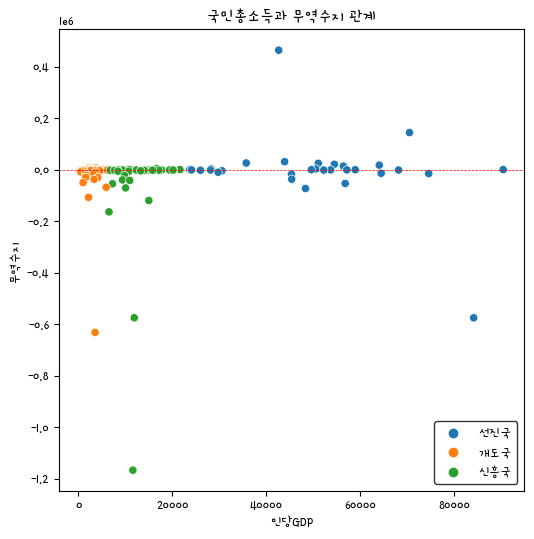

In [176]:
# 인당GDP와 무역수지의 산점도를 그립니다.
# [힌트] sns.scatterplot() 함수를 사용하세요.
# hue 매개변수에 범주형 변수명을 지정하면 점의 채우기 색을 다르게 지정합니다.
# 점의 크기는 s 매개변수에 정수로 지정합니다.(기본값: 50)
sns.scatterplot(data = trade, x = '인당GDP', y = '무역수지', hue = '국가등급')
plt.axhline(y = 0, color = 'red', linewidth = 0.5, linestyle = '--')
plt.title(label = '국민총소득과 무역수지 관계')

# 범례의 위치를 오른쪽 아래로 지정합니다.
plt.legend(loc = 'lower right');

### 무역수지 흑자 1위 국가의 수출입 수산물 목록 확인

In [177]:
# sfd에서 nation이 '일본'인 행을 데이터프레임 japan에 할당합니다.
# [힌트] eq() 함수를 사용하세요.
japan = sfd[sfd['nation'].eq('일본')]

In [178]:
# japan의 정보를 확인합니다.
japan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2614 entries, 1547 to 31005
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ymonth  2614 non-null   object 
 1   nation  2614 non-null   object 
 2   itemNm  2614 non-null   object 
 3   imxprt  2614 non-null   object 
 4   weight  2614 non-null   float64
 5   dollar  2614 non-null   float64
dtypes: float64(2), object(4)
memory usage: 143.0+ KB


In [179]:
# 아래 조건을 만족하는 피벗 테이블을 japan에 재할당합니다.
# [힌트] pd.pivot_table() 함수를 사용하세요.
# 데이터(data)는 japan, 값(values)은 dollar, 
# 행이름(index)은 itemNm, 열이름(columns)은 imxprt, 
# 집계함수는 np.sum을 지정하세요.
japan = pd.pivot_table(
    data = japan,
    values = 'dollar',
    index = 'itemNm', 
    columns = 'imxprt', 
    aggfunc = np.sum
)

In [180]:
# japan의 처음 10행을 출력합니다.
japan.head(n = 10)

imxprt,수입,수출
itemNm,,
가공하지 않은 것,0.350,0.041
가공한 것,6.018,1.059
가다랑어,4.409,2580.066
가리비과,39305.985,13.476
가오리,4622.530,NaN
가자미,NaN,0.009
간,7.931,25.204
간유,0.019,27.766
갈치,3618.230,253.127


In [181]:
# japan에 있는 결측값을 0으로 대체하고 japan에 재할당합니다.
# [힌트] fillna() 함수를 사용하세요.
japan = japan.fillna(value = 0)

In [182]:
# japan의 인덱스 네임을 '수산물'로 변경합니다.
# [힌트] index.name 속성을 사용하세요.
japan.index.name = '수산물'

In [183]:
# japan의 열이름 네임에 빈 문자열을 지정합니다.
# [힌트] columns.name 속성을 사용하세요.
japan.columns.name = ''

In [184]:
japan.head()

,수입,수출
수산물,,
가공하지 않은 것,0.350,0.041
가공한 것,6.018,1.059
가다랑어,4.409,2580.066
가리비과,39305.985,13.476
가오리,4622.530,0.000


In [187]:
japan.set_index(keys = '수산물')

,수입,수출
수산물,,
가공하지 않은 것,0.350,0.041
가공한 것,6.018,1.059
가다랑어,4.409,2580.066
가리비과,39305.985,13.476
가오리,4622.530,0.000
...,...,...
해파리,382.517,0.000
홍어,1010.925,0.000
홍합,0.016,104.642


In [185]:
# japan의 인덱스를 초기화합니다.
# [힌트] reset_index() 함수를 사용하세요.
# [참고] 기존 인덱스를 열로 추가하려면 drop = True를 추가하지 않습니다.
japan = japan.reset_index()

In [186]:
# japan의 처음 5행을 출력합니다.
japan.head()

,수산물,수입,수출
0,가공하지 않은 것,0.350,0.041
1,가공한 것,6.018,1.059
2,가다랑어,4.409,2580.066
3,가리비과,39305.985,13.476
4,가오리,4622.530,0.000


In [188]:
# japan의 수출에서 수입을 뺀 무역수지를 생성합니다.
japan['무역수지'] = japan['수출'] - japan['수입']

In [189]:
# japan을 무역수지로 내림차순 정렬하고 japan에 재할당합니다.
# [힌트] sort_values() 함수를 사용하세요.
japan = japan.sort_values(by = ['무역수지'], ascending = False)

In [190]:
# japan의 처음 10행을 출력합니다.(무역수지 흑자 수산물)
japan.head(n = 10)

,수산물,수입,수출,무역수지
42,다랑어,1275.676,128950.909,127675.233
26,김,436.750,114139.670,113702.920
124,전복,36.525,42698.612,42662.087
77,붕장어,0.000,31125.801,31125.801
33,냉동한 것,501.435,22728.785,22227.350
76,붉은 대게살,62.880,21318.554,21255.674
160,황새치,402.789,19485.220,19082.431
65,바지락,0.000,17493.784,17493.784
123,전갱이,2.444,17431.010,17428.566
37,넙치,0.000,17113.017,17113.017


In [191]:
# japan의 마지막 10행을 출력합니다.(무역수지 적자 수산물)
japan.tail(n = 10)

,수산물,수입,수출,무역수지
39,농어,2228.608,469.551,-1759.057
11,개아지살,3220.833,693.652,-2527.181
8,갈치,3618.230,253.127,-3365.103
149,포유동물,4056.177,111.589,-3944.588
4,가오리,4622.530,0.000,-4622.530
59,명태,6158.574,100.207,-6058.367
117,우렁쉥이,7345.288,0.000,-7345.288
66,방어,36058.005,3505.671,-32552.334
50,돔,36402.686,21.139,-36381.547
3,가리비과,39305.985,13.476,-39292.509


### [보너스]

In [192]:
# 국가명을 지정하면 수출입 수산물 목록을 반환하는 함수를 생성합니다.
# [참고] 함수에서 정의하지 않은 인수는 글로벌 변수를 사용합니다.(ex: sfd)
# [주의] 글로벌 변수 목록에 없으면 에러를 반환합니다.
def seafoodItemList(nation):
    items = sfd[sfd['nation'].eq(nation)]
    items = pd.pivot_table(
        data = items, 
        values = 'dollar', 
        index = 'itemNm', 
        columns = 'imxprt', 
        aggfunc = np.sum
    )
    items = items.fillna(value = 0)
    items.index.name = '수산물'
    items.columns.name = ''
    items = items.reset_index()
    items['무역수지'] = items['수출'] - items['수입']
    items = items.sort_values(by = ['무역수지'], ascending = False)
    return items

In [193]:
# 일본과의 수산물 무역수지 데이터를 japan에 할당합니다.
japan = seafoodItemList(nation = '일본')

In [194]:
# japan을 출력합니다.
japan

,수산물,수입,수출,무역수지
42,다랑어,1275.676,128950.909,127675.233
26,김,436.750,114139.670,113702.920
124,전복,36.525,42698.612,42662.087
77,붕장어,0.000,31125.801,31125.801
33,냉동한 것,501.435,22728.785,22227.350
...,...,...,...,...
59,명태,6158.574,100.207,-6058.367
117,우렁쉥이,7345.288,0.000,-7345.288
66,방어,36058.005,3505.671,-32552.334
50,돔,36402.686,21.139,-36381.547


In [197]:
seafoodItemList(nation = '중국')

,수산물,수입,수출,무역수지
28,김,276.615,139377.849,139101.234
56,명태,5876.522,128797.853,122921.331
48,대구,2980.957,64479.232,61498.275
78,삼치,60.038,34821.640,34761.602
159,해삼,1478.833,29794.894,28316.061
...,...,...,...,...
63,바지락,44599.017,0.000,-44599.017
31,꽃게,60971.195,5418.514,-55552.681
27,기타,158169.906,73960.888,-84209.018
127,조기,98510.747,52.674,-98458.073


### 막대그래프 그리기

In [202]:
for i, v in enumerate(top10['무역수지']):
    print(f'{i}번 인덱스의 원소는 {v}입니다.')

0번 인덱스의 원소는 127675.233입니다.
1번 인덱스의 원소는 113702.92입니다.
2번 인덱스의 원소는 42662.087입니다.
3번 인덱스의 원소는 31125.801입니다.
4번 인덱스의 원소는 22227.35입니다.
5번 인덱스의 원소는 21255.674입니다.
6번 인덱스의 원소는 19082.431입니다.
7번 인덱스의 원소는 17493.784입니다.
8번 인덱스의 원소는 17428.566입니다.
9번 인덱스의 원소는 17113.017입니다.


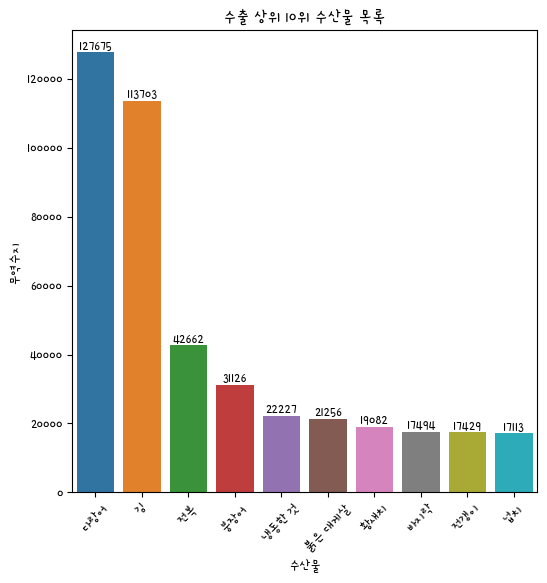

In [206]:
# japan의 처음 10행을 top10에 할당하고 막대그래프를 그립니다.
top10 = japan.head(n = 10)

# [힌트] sns.barplot() 함수를 사용하세요.
# x축에 수산물, y축에 무역수지를 지정합니다.
sns.barplot(data = top10, x = '수산물', y = '무역수지')

# 그래프 제목을 '수출 상위 10위 수산물 목록'으로 지정합니다.
plt.title(label = '수출 상위 10위 수산물 목록')

# x축 눈금명을 45도 회전시킵니다.
plt.xticks(rotation = 45)

# 막대 위에 무역수지를 반올림하여 정수만 남긴 수를 텍스트로 추가합니다.
for i, v in enumerate(top10['무역수지']):
    plt.text(x = i, y = v, s = int(round(v, 0)), ha = 'center', va = 'bottom');

In [210]:
# Color Brewer: 'sequential', 'diverging', and 'qualitative'
sns.choose_colorbrewer_palette(data_type = 'diverging');

interactive(children=(Dropdown(description='name', options=('RdBu', 'RdGy', 'PRGn', 'PiYG', 'BrBG', 'RdYlBu', …

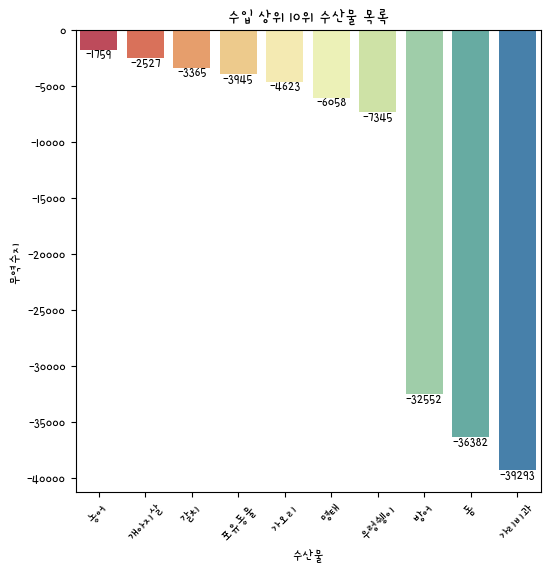

In [208]:
# japan의 마지막 10행을 btm10에 할당하고 막대그래프를 그립니다.
btm10 = japan.tail(n = 10)

# [힌트] sns.barplot() 함수를 사용하세요.
# x축에 수산물, y축에 무역수지를 지정합니다.
sns.barplot(data = btm10, x = '수산물', y = '무역수지', palette = 'Spectral')

# 그래프 제목을 '수입 상위 10위 수산물 목록'으로 지정합니다.
plt.title(label = '수입 상위 10위 수산물 목록')

# x축 눈금명을 45도 회전시킵니다.
plt.xticks(rotation = 45)

# 막대 아래에 무역수지를 반올림하여 정수만 남긴 수를 텍스트로 추가합니다.
for i, v in enumerate(btm10['무역수지']):
    plt.text(x = i, y = v, s = int(round(v, 0)), ha = 'center', va = 'top');

## End of Document